In [8]:
rates <- read.csv("./rates.csv",header = TRUE,row.names = 1 )
head(rates)

,X1M,X2M,X3M,X6M,X1Y,X2Y,X3Y,X5Y,X7Y,X10Y,X20Y,X30Y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
01/03/22,0.05,0.06,0.08,0.22,0.40,0.78,1.04,1.37,1.55,1.63,2.05,2.01
01/04/22,0.06,0.05,0.08,0.22,0.38,0.77,1.02,1.37,1.57,1.66,2.10,2.07
01/05/22,0.05,0.06,0.09,0.22,0.41,0.83,1.10,1.43,1.62,1.71,2.12,2.09
01/06/22,0.04,0.05,0.10,0.23,0.45,0.88,1.15,1.47,1.66,1.73,2.12,2.09
01/07/22,0.05,0.05,0.10,0.24,0.43,0.87,1.17,1.50,1.69,1.76,2.15,2.11
01/10/22,0.05,0.06,0.13,0.28,0.46,0.92,1.21,1.53,1.71,1.78,2.15,2.11


In [9]:
maturities <- c(1/12,2/12,3/12,0.5,1,2,3,5,7,10,20,30)
round(maturities,3)

[1]  0.083  0.167  0.250  0.500  1.000  2.000  3.000  5.000  7.000 10.000
[11] 20.000 30.000

In [10]:
(ncol <- dim(rates)[2])


[1] 12

In [11]:
(nrow <- dim(rates)[1])


[1] 557

In [12]:
pca <- prcomp(rates, scale = TRUE)
summary(pca)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     3.3786 0.6708 0.33460 0.11079 0.07438 0.04482 0.03806
Proportion of Variance 0.9512 0.0375 0.00933 0.00102 0.00046 0.00017 0.00012
Cumulative Proportion  0.9512 0.9887 0.99806 0.99909 0.99955 0.99971 0.99984
                           PC8     PC9    PC10    PC11    PC12
Standard deviation     0.02911 0.02089 0.01831 0.01572 0.01032
Proportion of Variance 0.00007 0.00004 0.00003 0.00002 0.00001
Cumulative Proportion  0.99991 0.99994 0.99997 0.99999 1.00000

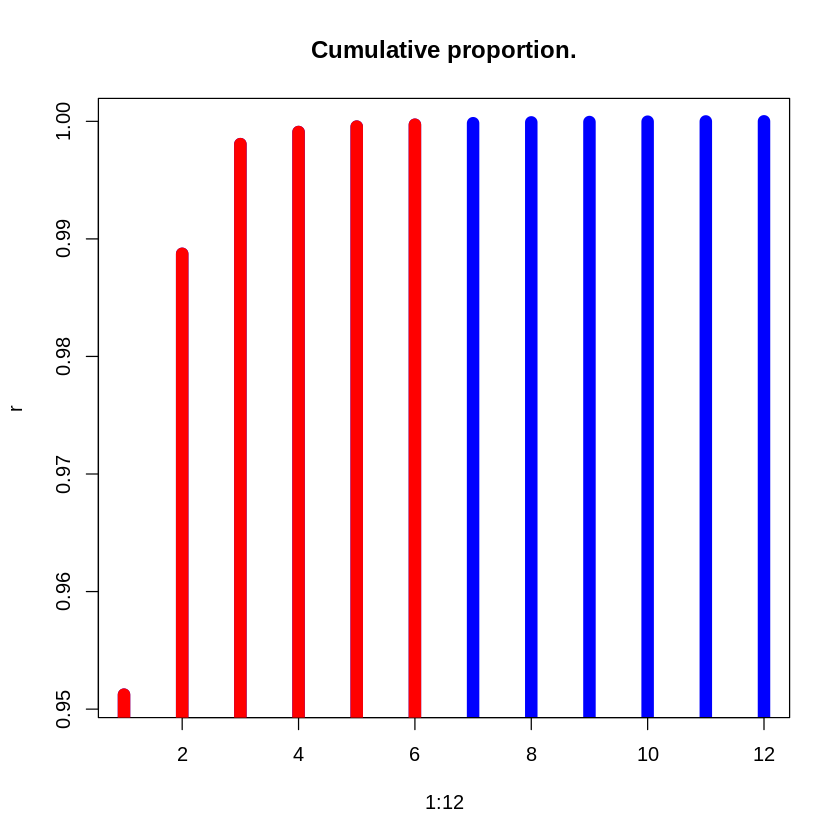

In [13]:
ss <- summary(pca)
his <- ss$importance[3,]
his[7:12]<- NA
r <- as.matrix(cbind(ss$importance[3,],his))

mp <- matplot(1:12,r,type = 'h',lty = 1, lwd = 10,main = "Cumulative proportion.", col = c("blue",'red')) # default
abline(h = 0.8,col = 'black')

In [14]:
Cumulative <- r

In [15]:
scores <- function(ldata,pca,number)
{
  cdata <- ldata
  m <- dim(ldata)[2]
  for (i in 1:m)
    cdata[,i] <- ldata[,i] - pca$center[i]
  loads <- pca$rotation[,1:number]
  cdata <- as.matrix(cdata)
  f <- cdata %*% loads
  return (f)
}

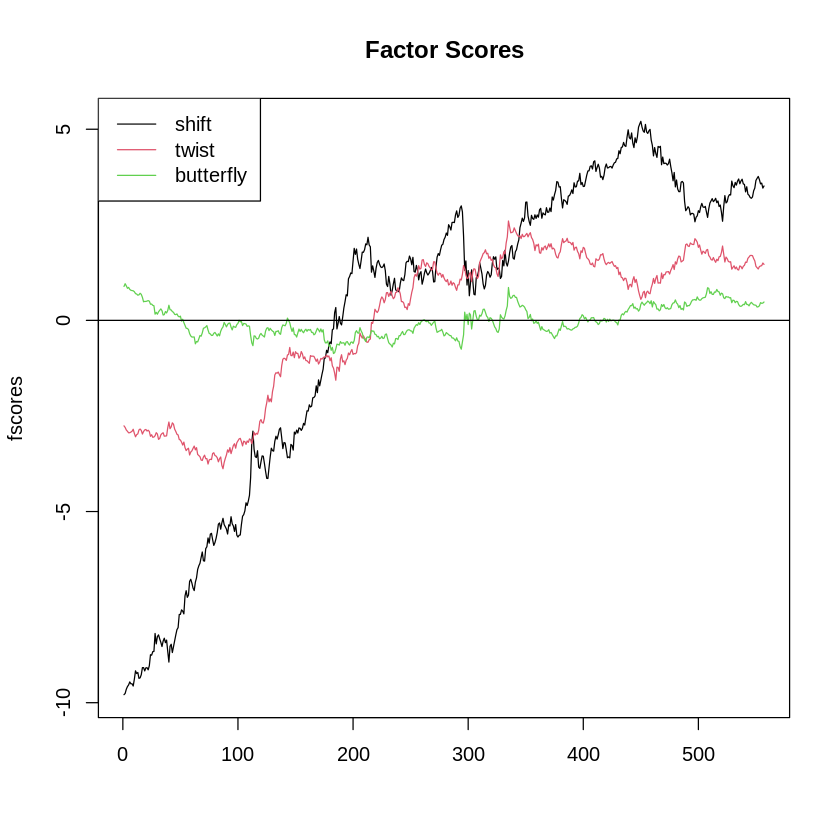

In [16]:
number <- 3
fscores <- scores(rates,pca,number)
matplot(fscores,type = 'l',lty = 1, col = 1:number,main = 'Factor Scores')
legend('topleft',c('shift','twist','butterfly'),col = 1:number,lty = 1)
abline(h=0)

In [17]:
Loadings <- ss$rotation[, 1:3]
head(Loadings)

,PC1,PC2,PC3
X1M,0.2824643,0.40132109,0.30354826
X2M,0.2856057,0.37908737,0.15287051
X3M,0.2864267,0.36946573,0.08154282
X6M,0.2889998,0.30541956,-0.13768914
X1Y,0.2916073,0.18475126,-0.32354134
X2Y,0.2926234,-0.03831936,-0.43063055


In [18]:
restoreData<- function(fscores,loadings,center)
{
  npca <- dim(fscores)[2]
  myeigen <- t(loadings[,1:npca])
  rest <- fscores %*%myeigen
  m <- length(center)
  if (m == dim(rest)[2])
  {
    for (i in 1:m)
    rest[,i] <- rest[,i]+center[i]
  }
  return(rest)
}
restored_data_rates <- restoreData(fscores,Loadings,pca$center)
head(restored_data_rates)

,X1M,X2M,X3M,X6M,X1Y,X2Y,X3Y,X5Y,X7Y,X10Y,X20Y,X30Y
01/03/22,0.02540818,0.06812014,0.1184169,0.2497346,0.3886216,0.7165778,1.025123,1.376260,1.599233,1.688238,2.094512,1.890442
01/04/22,0.03877618,0.07190423,0.1176049,0.2362548,0.3672213,0.6970873,1.012433,1.384022,1.621796,1.723927,2.138269,1.941663
01/05/22,0.02680308,0.07009020,0.1204673,0.2557552,0.4052233,0.7557588,1.079866,1.445421,1.673453,1.764126,2.170926,1.962868
01/06/22,0.01328022,0.06720248,0.1225364,0.2742496,0.4399562,0.8050990,1.133431,1.487818,1.703804,1.781718,2.180307,1.961354
01/07/22,0.01665011,0.06808024,0.1221698,0.2714278,0.4377040,0.8092437,1.143499,1.507260,1.728631,1.810588,2.211534,1.993594
01/10/22,0.02430328,0.08363739,0.1414189,0.3019344,0.4776069,0.8541053,1.187292,1.538982,1.750124,1.822210,2.216900,1.991974


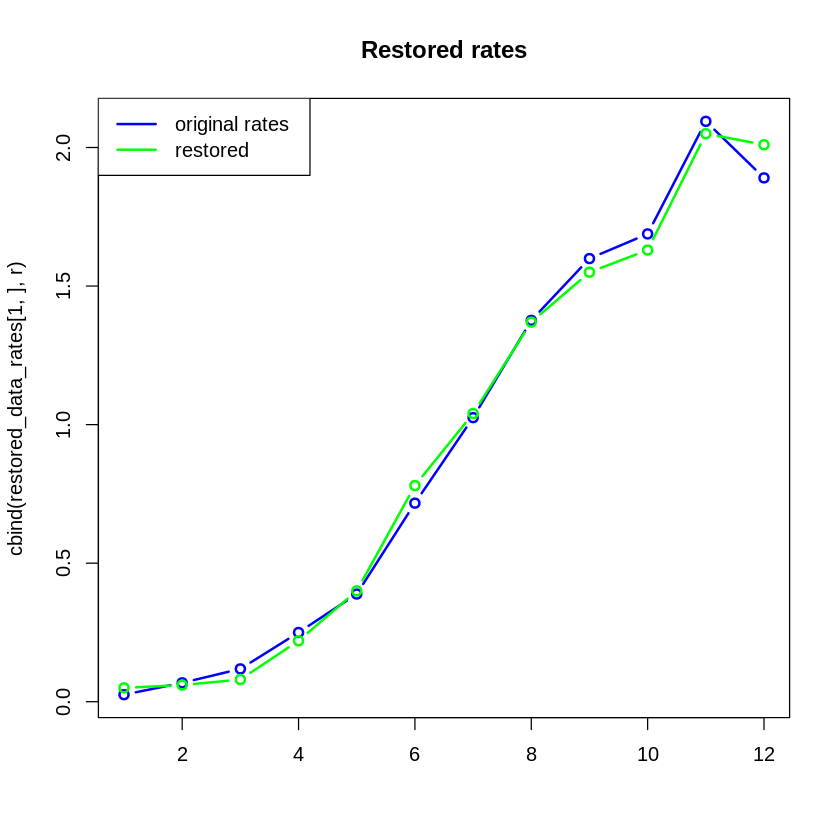

In [19]:
r <- unlist(rates[1,])
matplot(cbind(restored_data_rates[1,],r),type ='b',pch=21,lwd = 2,main = 'Restored rates',col = c('blue','green'),lty = 1)
legend('topleft',c('original rates','restored'),lty=1,lwd=2,col=c('blue','green') )

In [31]:
var <- 11

In [21]:
rates[c("10/12/22", "10/13/22"), ]

,X1M,X2M,X3M,X6M,X1Y,X2Y,X3Y,X5Y,X7Y,X10Y,X20Y,X30Y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10/12/22,3.07,3.45,3.70,4.16,4.28,4.28,4.29,4.12,4.03,3.91,4.18,3.90
10/13/22,3.35,3.60,3.79,4.30,4.46,4.47,4.44,4.21,4.11,3.97,4.25,3.97


In [46]:
install.packages('FinAna')
library(FinAna)
portfolio <- c(150,15,15,15,200,15,20,20,10,10,10,10) * 1000

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [34]:
par <- 1000
m <- 2
coupon <- 0.09

In [49]:
yield_1 <- rates["10/12/22", ]
yield_2 <- rates["10/13/22", ]
tau <- c(1/12,1/6,1/4,1/2,1,2,3,5,7,10,20,30 )
price1 <- sum(bond.price(portfolio,coupon,tau,yield_2,m))
price2 <- sum(bond.price(portfolio,coupon,tau,yield_1,m))
price1


[1] 177602.5

In [50]:
portfolio_change <- price2-price1
portfolio_change

[1] 2767.639

In [52]:
fscores[nrow(fscores), ]
fscores_new <- rbind(fscores[nrow(fscores), ], c(0, 0, 0))
fscores_new

PC1      PC2      PC3 
3.515219 1.464785 0.480577

PC1,PC2,PC3
3.515219,1.464785,0.480577
0.000000,0.000000,0.000000


In [53]:
fscores_new[2, ] = c(3.515219 * 1.15,	1.464785,	0.480577)
fscores_new

PC1,PC2,PC3
3.515219,1.464785,0.480577
4.042502,1.464785,0.480577


In [54]:
restored_data_rates_new <- restoreData(fscores_new,Loadings,pca$center)
head(restored_data_rates_new)

X1M,X2M,X3M,X6M,X1Y,X2Y,X3Y,X5Y,X7Y,X10Y,X20Y,X30Y
5.355018,5.407059,5.456725,5.441159,5.180844,4.623777,4.286979,4.096866,4.153703,4.208701,4.599996,4.583541
5.503956,5.557654,5.607753,5.593544,5.334604,4.778072,4.440229,4.249615,4.306341,4.361235,4.752070,4.735781


In [55]:
library(FinAna)
portfolio <- c(150,15,15,15,200,15,20,20,10,10,10,10) * 1000
par <- 1000
m <- 2
coupon <- 0.09
yield_1 <- restored_data_rates_new[1, ]
yield_2 <- restored_data_rates_new[2, ]
tau <- c(1/12,1/6,1/4,1/2,1,2,3,5,7,10,20,30 )
forecast_change <- sum(bond.price(portfolio,coupon,tau,yield_2,m)) - sum(bond.price(portfolio,coupon,tau,yield_1,m))
forecast_change

[1] -1445.724

In [56]:
result = list(
    var = var,
    Cumulative = Cumulative,
    Fscores = fscores,
    Loadings = Loadings,
    restored_data_rates= restored_data_rates,
    portfolio_change = portfolio_change,
    forecast_change= forecast_change
)

In [57]:
saveRDS(result,'./result.rds')
